In [1]:
# import libraries
from numpy import array
from numpy import hstack

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense


2024-03-13 21:02:36.691685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-13 21:02:36.691810: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Multivariate data preparation

two or more parallel input time series and an output time series that is dependent on the input time series.

In [2]:
# define a function named split sequences() that will take a dataset as 
# we have defined it with rows for time steps and columns for parallel series and 
# return input/output samples.

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [5]:
# choose a number of time steps
n_steps = 3

# transform to a supervised learning problem
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))

print(X.shape, y.shape)
#print(n_input, n_output)

(6, 3, 3) (6, 3)
(6, 9) (6, 3)


## Sequential Model

In [6]:
# first input model
visible = Input(shape=(n_input,))
dense = Dense(100, activation= 'relu' )(visible)

# define output layers
# define output 1
output1 = Dense(1)(dense)
# define output 2
output2 = Dense(1)(dense)
# define output 2
output3 = Dense(1)(dense)

# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])


# configure model
model.compile(optimizer= 'adam' , loss= 'mse' )

2024-03-13 21:03:31.082584: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-13 21:03:31.082722: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-13 21:03:31.082830: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seetha-HP-348-G4): /proc/driver/nvidia/version does not exist
2024-03-13 21:03:31.091254: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


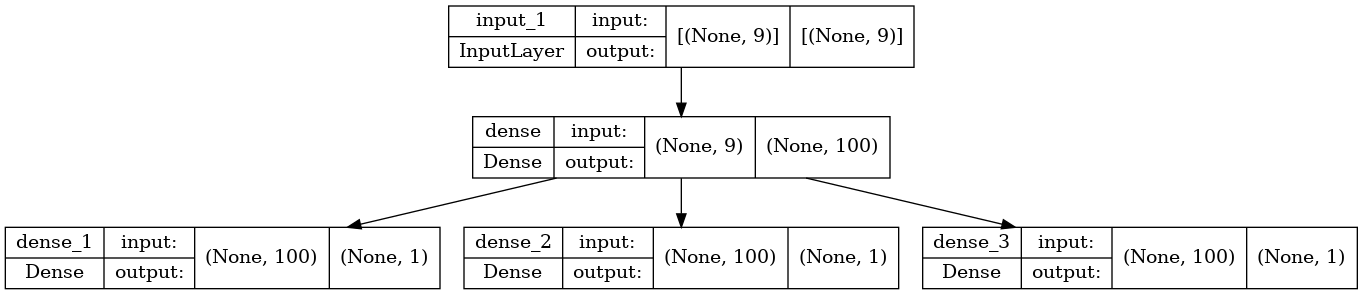

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='5B.png', 
    show_shapes=True,show_dtype=False, show_layer_names=True,)

from IPython.display import Image
Image(filename='5B.png') 

In [8]:
# Training
# fit model
history = model.fit(X, [y1,y2,y3], epochs=2000, verbose=0)

In [9]:
# demonstrate prediction
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_input))

yhat = model.predict(x_input, verbose=0)
print(yhat)

[array([[100.58443]], dtype=float32), array([[104.84965]], dtype=float32), array([[205.31595]], dtype=float32)]
